In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
coordinates = zip(lats, lngs)
coordinates

In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c766dae17b661fbc746c1d6e947ca4ac


In [7]:
# Import the datetime module from the datetime library. Lesson 6.2.6
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list. ( should be replaced for the code bellow??)
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Processing Record 1 of Set 12 | carnarvon
Processing Record 2 of Set 12 | ejido
Processing Record 3 of Set 12 | mar del plata
Processing Record 4 of Set 12 | ushuaia
Processing Record 5 of Set 12 | rikitea
Processing Record 6 of Set 12 | la romana
Processing Record 7 of Set 12 | mount gambier
Processing Record 8 of Set 12 | coruripe
Processing Record 9 of Set 12 | husavik
Processing Record 10 of Set 12 | sola
Processing Record 11 of Set 12 | cape town
Processing Record 12 of Set 12 | jamestown
Processing Record 13 of Set 12 | saint george
Processing Record 14 of Set 12 | longyearbyen
Processing Record 15 of Set 12 | arraial do cabo
Processing Record 16 of Set 12 | marcona
Processing Record 17 of Set 12 | ankang
Processing Record 18 of Set 12 | novobirilyussy
Processing Record 19 of Set 12 | yellowknife
Processing Record 20 of Set 12 | kimbe
Processing Record 21 of Set 12 | talaya
Processing Record 22 of Set 12 | punta arenas
Processing Record 23 of Set 12 | balabac
Processing Record 24

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    #Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(city_data)

Processing Record 39 of Set 23 | carnarvon
Processing Record 40 of Set 23 | ejido
Processing Record 41 of Set 23 | mar del plata
Processing Record 42 of Set 23 | ushuaia
Processing Record 43 of Set 23 | rikitea
Processing Record 44 of Set 23 | la romana
Processing Record 45 of Set 23 | mount gambier
Processing Record 46 of Set 23 | coruripe
Processing Record 47 of Set 23 | husavik
Processing Record 48 of Set 23 | sola
Processing Record 49 of Set 23 | cape town
Processing Record 50 of Set 23 | jamestown
Processing Record 51 of Set 23 | saint george
Processing Record 52 of Set 23 | longyearbyen
Processing Record 53 of Set 23 | arraial do cabo
Processing Record 54 of Set 23 | marcona
City not found. Skipping...
Processing Record 55 of Set 23 | ankang
Processing Record 56 of Set 23 | novobirilyussy
Processing Record 57 of Set 23 | yellowknife
Processing Record 58 of Set 23 | kimbe
Processing Record 59 of Set 23 | talaya
Processing Record 60 of Set 23 | punta arenas
Processing Record 61 of 

Processing Record 32 of Set 26 | solano
Processing Record 33 of Set 26 | palabuhanratu
City not found. Skipping...
Processing Record 34 of Set 26 | usinsk
Processing Record 35 of Set 26 | sompeta
Processing Record 36 of Set 26 | fort walton beach
Processing Record 37 of Set 26 | bluff
Processing Record 38 of Set 26 | talara
Processing Record 39 of Set 26 | ajaccio
Processing Record 40 of Set 26 | amderma
City not found. Skipping...
Processing Record 41 of Set 26 | mys shmidta
City not found. Skipping...
Processing Record 42 of Set 26 | tambun
Processing Record 43 of Set 26 | krasnozerskoye
Processing Record 44 of Set 26 | poum
Processing Record 45 of Set 26 | upernavik
Processing Record 46 of Set 26 | tasiilaq
Processing Record 47 of Set 26 | mayor pablo lagerenza
Processing Record 48 of Set 26 | coihaique
Processing Record 49 of Set 26 | epe
Processing Record 50 of Set 26 | atherton
Processing Record 1 of Set 27 | thompson
Processing Record 2 of Set 27 | cazones
Processing Record 3 of

Processing Record 17 of Set 30 | kosh-agach
Processing Record 18 of Set 30 | los llanos de aridane
Processing Record 19 of Set 30 | pangnirtung
Processing Record 20 of Set 30 | gatton
Processing Record 21 of Set 30 | nayudupeta
Processing Record 22 of Set 30 | christchurch
Processing Record 23 of Set 30 | zyryanka
Processing Record 24 of Set 30 | alice springs
Processing Record 25 of Set 30 | lermontovka
Processing Record 26 of Set 30 | coahuayana
Processing Record 27 of Set 30 | sobolevo
Processing Record 28 of Set 30 | malinovoye ozero
Processing Record 29 of Set 30 | adre
Processing Record 30 of Set 30 | caravelas
Processing Record 31 of Set 30 | sandomierz
Processing Record 32 of Set 30 | xinpu
Processing Record 33 of Set 30 | egvekinot
Processing Record 34 of Set 30 | deputatskiy
Processing Record 35 of Set 30 | miles city
Processing Record 36 of Set 30 | tatawin
Processing Record 37 of Set 30 | kailua
Processing Record 38 of Set 30 | agirish
Processing Record 39 of Set 30 | otane

Processing Record 9 of Set 34 | berbera
Processing Record 10 of Set 34 | roebourne
Processing Record 11 of Set 34 | kamenskoye
City not found. Skipping...
Processing Record 12 of Set 34 | patacamaya
Processing Record 13 of Set 34 | nagornyy
Processing Record 14 of Set 34 | karkaralinsk
City not found. Skipping...
Processing Record 15 of Set 34 | napanee
Processing Record 16 of Set 34 | moroni
Processing Record 17 of Set 34 | jumla
Processing Record 18 of Set 34 | seaham
Processing Record 19 of Set 34 | jerantut
Processing Record 20 of Set 34 | oistins
Processing Record 21 of Set 34 | komsomolskiy
Processing Record 22 of Set 34 | grootfontein
Processing Record 23 of Set 34 | waw
Processing Record 24 of Set 34 | ulaangom
Processing Record 25 of Set 34 | lewisporte
Processing Record 26 of Set 34 | atka
City not found. Skipping...
Processing Record 27 of Set 34 | carauari
Processing Record 28 of Set 34 | taldom
Processing Record 29 of Set 34 | nantucket
Processing Record 30 of Set 34 | han

In [12]:
# Lesson 6.2.7
#Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carnarvon,-24.8667,113.6333,60.87,82,0,17.27,AU,2021-10-07 20:52:31
1,Ejido,8.5514,-71.2375,75.40,80,100,3.47,VE,2021-10-07 20:52:32
2,Mar Del Plata,-38.0023,-57.5575,55.42,58,0,8.01,AR,2021-10-07 20:50:32
3,Ushuaia,-54.8000,-68.3000,49.62,46,0,4.61,AR,2021-10-07 20:52:33
4,Rikitea,-23.1203,-134.9692,73.65,76,46,8.52,PF,2021-10-07 20:52:33
5,La Romana,18.4273,-68.9728,88.16,74,40,6.91,DO,2021-10-07 20:52:34
6,Mount Gambier,-37.8333,140.7667,42.71,93,100,9.22,AU,2021-10-07 20:51:24
7,Coruripe,-10.1256,-36.1756,75.61,77,94,8.08,BR,2021-10-07 20:52:35
8,Husavik,66.0449,-17.3389,42.71,96,100,26.93,IS,2021-10-07 20:52:35
9,Sola,-13.8833,167.5500,80.55,77,29,18.37,VU,2021-10-07 20:52:36


In [72]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Lat",
                    "Lng", "Max Temp", "Humidity", 
                    "Cloudiness", "Wind Speed"]

# Assign a new or the same DataFrame the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Carnarvon,AU,-24.8667,113.6333,60.87,82,0,17.27
1,Ejido,VE,8.5514,-71.2375,75.40,80,100,3.47
2,Mar Del Plata,AR,-38.0023,-57.5575,55.42,58,0,8.01
3,Ushuaia,AR,-54.8000,-68.3000,49.62,46,0,4.61
4,Rikitea,PF,-23.1203,-134.9692,73.65,76,46,8.52
5,La Romana,DO,18.4273,-68.9728,88.16,74,40,6.91
6,Mount Gambier,AU,-37.8333,140.7667,42.71,93,100,9.22
7,Coruripe,BR,-10.1256,-36.1756,75.61,77,94,8.08
8,Husavik,IS,66.0449,-17.3389,42.71,96,100,26.93
9,Sola,VU,-13.8833,167.5500,80.55,77,29,18.37


In [73]:
# LESSON 6.2.7   Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [74]:
# Extract relevant fields from the DataFrame for plotting. Lessonj 6.3.1
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [75]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1633644681.5561972

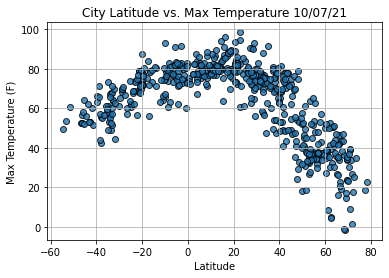

In [76]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

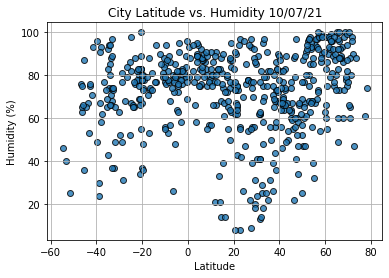

In [77]:
#Lesson 6.3.2
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

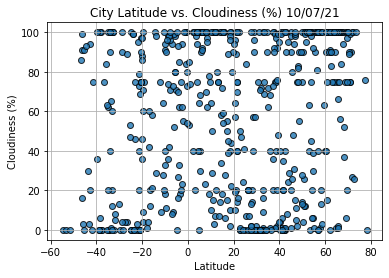

In [78]:
#Lesson 6.3.3
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

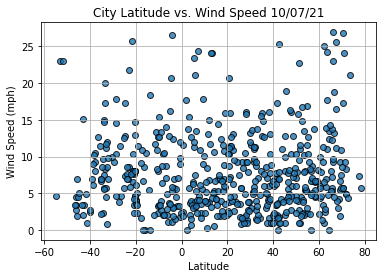

In [79]:
# Lesson 6.3.4
#Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [80]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    def func_name():
        Pass

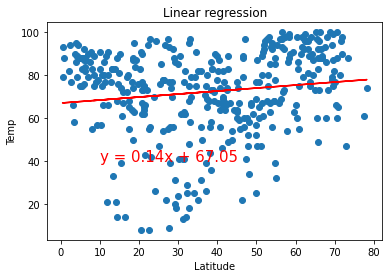

In [86]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title("Linear regression")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [108]:
# Import linregress Lesson 6.4.2
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [109]:
#Lesson 6.4.2
index13 = city_data_df.loc[13]

In [110]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Ejido,VE,8.5514,-71.2375,75.40,80,100,3.47
5,La Romana,DO,18.4273,-68.9728,88.16,74,40,6.91
8,Husavik,IS,66.0449,-17.3389,42.71,96,100,26.93
11,Jamestown,US,42.0970,-79.2353,78.12,64,1,0.00
12,Saint George,US,37.1041,-113.5841,81.07,39,20,3.00
...,...,...,...,...,...,...,...,...
537,Sakit,IN,27.4500,78.8167,78.37,55,2,0.94
538,Ciudad Bolivar,VE,8.1222,-63.5497,88.50,55,95,6.13
539,Tezpur,IN,26.6333,92.8000,73.92,94,7,1.66
540,Kondoros,HU,46.7667,20.8000,55.42,56,100,8.10


In [111]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

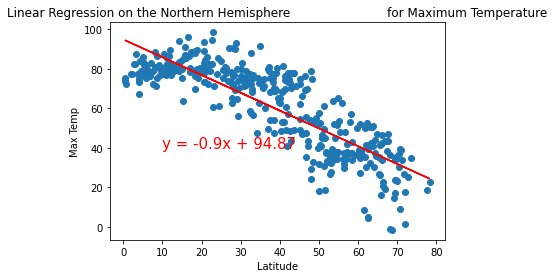

In [112]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

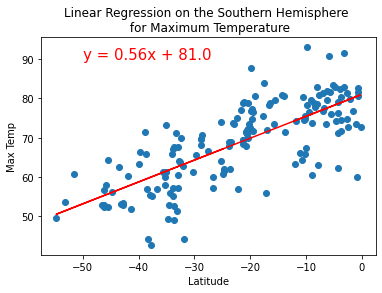

In [113]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

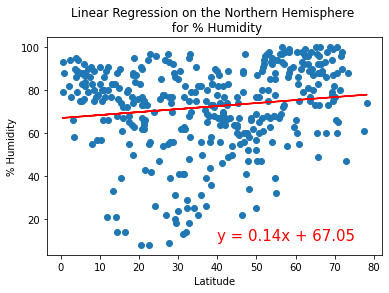

In [114]:
#Lesson 6.4.3
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

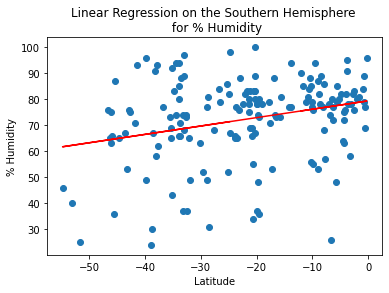

In [115]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

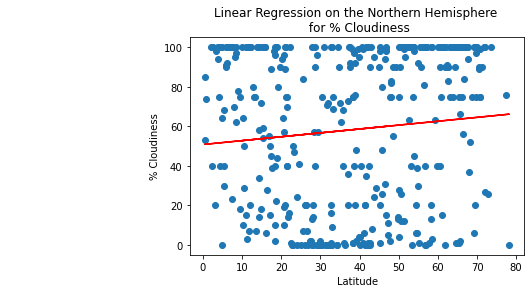

In [116]:
#SKillDrill Lesson 6.4.4
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

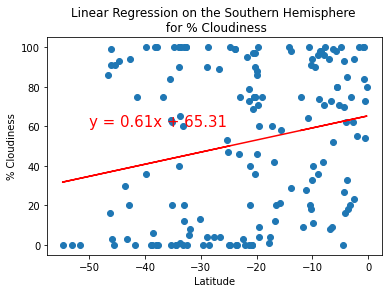

In [117]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

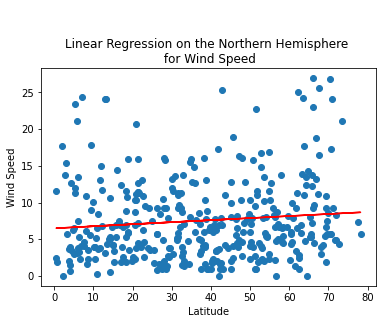

In [118]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

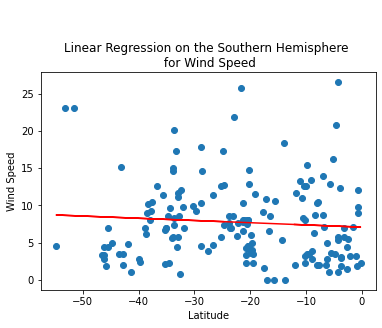

In [119]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))